# Week 5 – Bifurcations and Chaos

### Aim: Work through lectures 13–16 and write Interim Reflective Report.

In [1]:
import numpy as np
from matplotlib import pyplot as plt
import slicc_tools as st

**Exercise 7.4.1**: Liénard's Equation: $\ddot x + \mu \left( x^2 - 1 \right) \dot x + \tanh{x} = 0$ where $\mu > 0$.

The equation is equivalent to:

$\dot x = y$

$\dot y = - \mu \left( x^2 - 1 \right) y - \tanh{x} = - f(x)y - g(x)$ where we have implicitly defined $f(x)$ and $g(x)$.

We can then apply *Liénard's Theorem* (p. 212):

1) For $\mu > 0$, both $f(x) = \mu \left( x^2 - 1 \right)$ and $g(x) = \tanh{x}$ are continuously differentiable.

2) $g(x)$ is an odd function, i.e. $g(-x) = - g(x)$ for all values of $x$.

3) $g(x) > 0$ for $x > 0$.

4) $f(x)$ is an even function, i.e. $f(x) = f(-x)$ for all values of $x$.

5) Taking the integral $F(x) = \int_0^x f(u) du = \mu \left( \frac{1}{3} u^3 - u \right) \big|_0^x = \mu \left( \frac{1}{3} x^3 - x \right)$, the odd function $F(x)$ has a positive zero at $x = \sqrt{3}$, is positive and nondecreasing for $x > \sqrt{3}$, and $F(x) \to \infty$ as $x \to \infty$.

According to Liénard, the system thus has a unique, stable limit cycle around the origin, i.e. exactly one periodic solution which is stable.

The system in question is illustrated below.

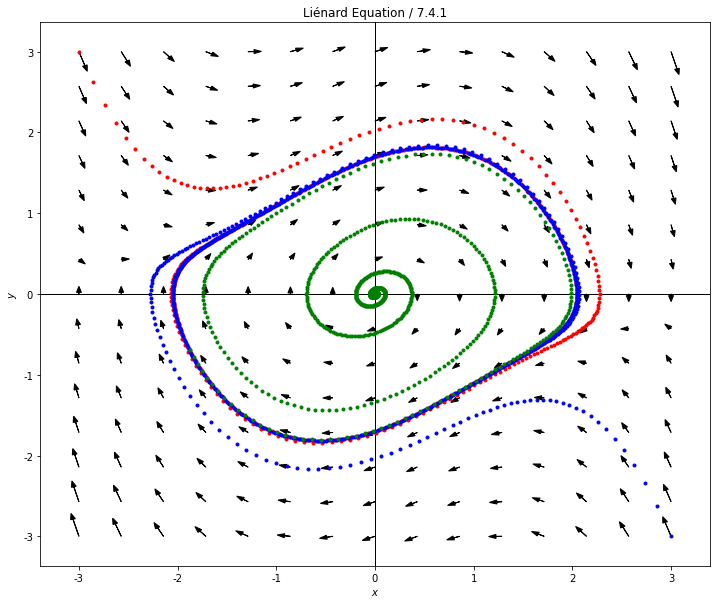

In [17]:
#Define the governing equations of the system
def lienard(v):
    x_deriv = v[1]
    y_deriv = - mu * (v[0]**2 - 1) * v[1] - np.tanh(v[0])
    
    return np.array([x_deriv, y_deriv])

#Declare the value of the parameter mu
mu = 0.4    

#Plot the direction field of the system
st.plot_direction_field(lienard, -3, 3, 15)

#Plot three trajectories with different initial conditions
st.plot_trajectory(lienard, [-3, 3], 700, dt = 0.05)
st.plot_trajectory(lienard, [3, -3], 700, c = 'b', dt = 0.05)
st.plot_trajectory(lienard, [-0.01, -0.01], 700, c = 'g', dt = 0.05)

plt.title('Liénard Equation / 7.4.1')

plt.show()

**Next Actions**:
- ~Do exercise 7.4.2~
- ~Get *The Misbehaviour of Markets* from the Main Library~
- ~Schedule writing the Interim Reflective Report~

## Lecture 13 – Hopf Bifurcations: Aeroelastic Instabilities and Chemical Oscillators

### Subcritical Hopf Bifurcation (p. 255–256)

Unstable cycle that surrounds a stable spiral $\rightarrow$ Unstable spiral (unstable limit cycle shrinks to amplitude zero).

As opposed to the supercritical case, the subcritical Hopf bifurcation is discontinuous and thus potentially dangerous / catastrophic.

**Example**: $\dot r = ar + r^3 - r^5$ and $\dot \theta = 1$

Plotted below using code borrowed from Week 4.

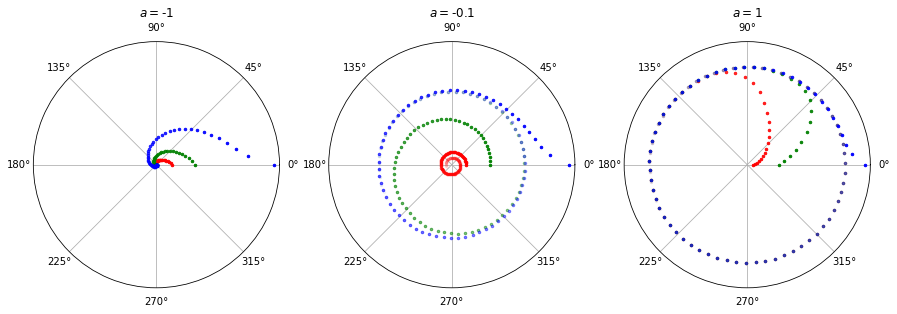

In [23]:
#Define the governing equations
def r_eq(r):
    return a * r + r**3 - r**5

def theta_eq(theta):
    return 1

#Format subplots in polar projection
fig, ax = plt.subplots(1, 3, figsize=(15, 5), subplot_kw={'projection': 'polar'})

#Define a list of values of parameter a
a_list = [-1, -0.1, 1]

#Define a list of marker colours and types
c = ['r.', 'g.', 'b.']

#Graph three instances of the system
for n in range(len(a_list)):
    #Declare parameter values
    a = a_list[n]
    
    #Declare initial coordinates
    r_list = [0.2, 0.5, 1.5]
    
    #Define time step
    dt = 0.1
    
    count = 0
    
    for r in r_list:
        theta = 0
        for t in np.arange(0, 10, dt):
            ax[n].plot(theta, r, c[count], ms = 5, alpha = (10-t)/10)
        
           #Calculate the next values
            r = st.runge_kutta(r, r_eq, dt = 0.1)
            theta = st.runge_kutta(theta, theta_eq, dt = 0.1)
            
        count += 1
        
        #Stylise subplots
        ax[n].set_title(r'$a = $' + str(a))
        ax[n].set_rticks([])
        
plt.show()

Above, at $a < -\frac{1}{4}$ the origin is a stable spiral (left). The saddle-node coalescence occurring at $a = -\frac{1}{4}$ results in a stable limit cycle (middle) and will be discussed later. For $-\frac{1}{4} < a < 0$ an unstable limit cycle exists between the red and green trajectories. Following the subcritical Hopf bifurcation at $a = 0$, the unstable limit cycle has shrunk to amplitude zero and the origin become an unstable spiral leading to a stable limit cycle (right).

**Note**: Linearisation cannot be used to distinguish between the supercritical and subcritical Hopf bifurcations.
> For an analytical criterion, see Exercises 8.2.12–15.

For example cases in aerodynamics, see [this video](https://www.youtube.com/watch?v=_Ys8qGxr--M) by Strogatz.

### Chemical Oscillators: Belousov-Zhabotinsky (BZ) Reaction (p. 257–263)

See [this video](https://www.youtube.com/watch?v=8R33KWPmqlo) by Strogatz and *Sync* ch. 8.

A simplified Chlorine Dioxide–Iodine–Malonic Acid Reaction model by Lengyel et al. (1990) can be expressed as a 2D system:

$\dot x = a - x - \frac{4xy}{1 + x^2}$

$\dot y = bx \left( 1 - \frac{y}{1 + x^2} \right)$

where $x, y$ are the dimensionless concentrations of I$^-$ and ClO$_2^-$ ions, respectively, and the parameters $a, b > 0$ are dependent on the concentrations of the other reactants.

Enter the value of parameter b: 2.5


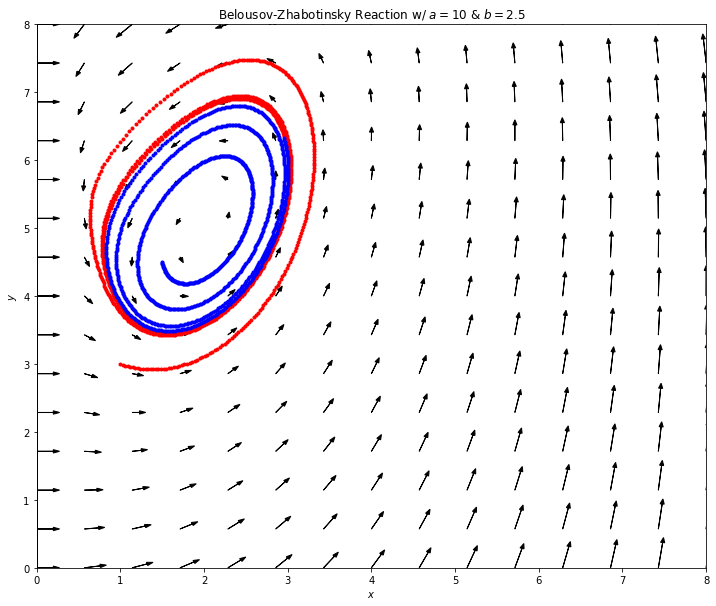

In [63]:
#Define the governing equations
def bz_reaction(v):
    x, y = v[0], v[1]
    x_deriv = a - x - (4*x*y) / (1 + x**2)
    y_deriv = b*x*(1 - y / (1 + x**2))
    
    return np.array([x_deriv, y_deriv])

#Declare the values of the two parameters
a = 10
b = float(input('Enter the value of parameter b: '))

#Plot the direction field of the system
st.plot_direction_field(bz_reaction, 0, 8, 15)

#Plot two different trajectories of the system
st.plot_trajectory(bz_reaction, [1, 3], 1000, dt = 0.01)
st.plot_trajectory(bz_reaction, [1.5, 4.5], 1000, dt = 0.01, c = 'b')

plt.title(rf'Belousov-Zhabotinsky Reaction w/ $a =${a} & $b =${b}')

plt.xlim([0, 8])
plt.ylim([0, 8])

plt.show()

Above, as the value of parameter $b$ is increased, the stable limit cycle (chemical oscillation) shrinks until disappearing at $b \approx 3.5$. The reaction then settles into an equilibrium. Try running the programme with different values of $b$!

**Exercise 7.4.2**: Liénard Equation $\ddot x + \mu \left( x^4 - 1 \right) \dot x + x = 0$.

This can be expressed as:

$\dot x = y$

$\dot y = - \mu \left(x^4 - 1 \right) y - x = -f(x)y -g(x)$ where $f(x) = \mu \left(x^4-1\right)$ and $g(x) = x$.

**a)** We apply Liénard's Theorem (p. 212) similar to 7.4.1:

1) Both $f(x)$ and $g(x)$ are continuously differentiable for all values of $x$.

2) $g(x)$ is an odd function.

3) $g(x) > 0$ for all $x > 0$.

4) $f(x)$ is an even function.

5) Taking the integral $F(x) = \int_0^x f(u) du = \mu \left( \frac{1}{5} u^5 - u \right) \big|_0^x = \mu \left( \frac{1}{5} x^5 - x \right)$, the odd function $F(x)$ has exactly one positive zero at $x = \sqrt[4]{5}$, is negative for $0 < x < \sqrt[4]{5}$, is positive and nondecreasing for $x > \sqrt[4]{5}$, and $F(x) \to \infty$ as $x \to \infty$. All this assuming $\mu > 0$.

Thus, the system has a unique, stable limit cycle.

**b)** We then plot the phase portrait of the system for $\mu = 1$.

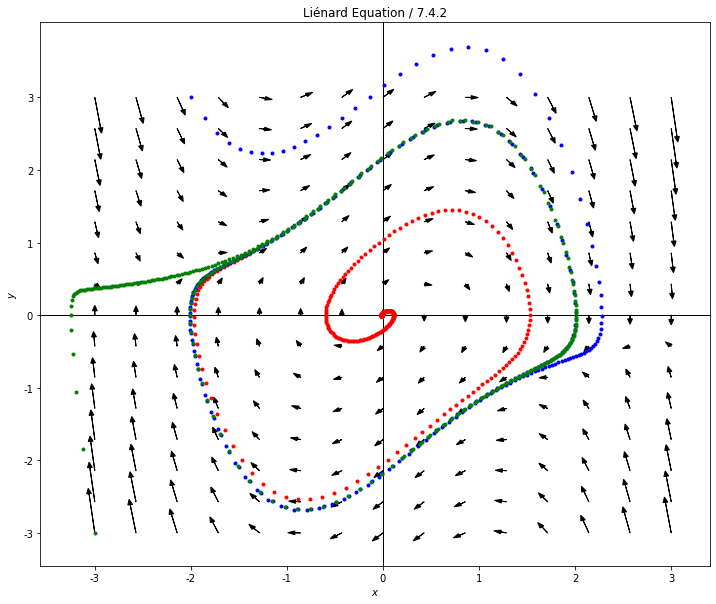

In [20]:
#Define the governing equations
def lienard_mu(v):
    x_deriv = v[1]
    y_deriv = - mu * (v[0]**2 - 1) * v[1] - v[0]
    
    return np.array([x_deriv, y_deriv])

#Declare the value of parameter mu
mu = 1

#Plot the direction field of the system
st.plot_direction_field(lienard_mu, -3, 3, 15)

st.plot_trajectory(lienard_mu, [-0.01, -0.01], 300, dt = 0.05)
st.plot_trajectory(lienard_mu, [-2, 3], 300, c = 'b', dt = 0.05)
st.plot_trajectory(lienard_mu, [-3, -3], 300, c = 'g', dt = 0.05)

plt.title('Liénard Equation / 7.4.2')

plt.show()

**c)** For $\mu < 0$, the odd function $F(x)$ is positive for $0 < x < \sqrt[4]{5}$ and negative for $x > \sqrt[4]{5}$, corresponding to positive damping at small $|x|$ and negative damping (driving) at large $|x|$. Small oscillations thus dies out while larger ones increase to infinity.

Thus, the system still has a limit cycle, albeit an unstable one.

**Next Actions**:
- ~[Lecture 14 – Global Bifurcations of Cycles](https://www.youtube.com/watch?v=CvDJnqScUVI&list=PLbN57C5Zdl6j_qJA-pARJnKsmROzPnO9V&index=14)~
- Watch [Strogatz's TED talk](https://www.youtube.com/watch?v=aSNrKS-sCE0)

## Lecture 14 – Global Bifurcations of Cycles (ch. 8.4, p. 264–268)

**Note**: Strogatz mentions that there are six more weeks of the course left, whereas the SLICC will go on for just four more weeks.
> Some of the later lectures may have to be left out of the experience.

### 1) Saddle-Node Coalescence of Limit Cycles

This was already seen in the first example system of Lecture 13:

$\dot r = \mu r + r^3 - r^5$

$\dot \theta = 1 + br^2$ where we can treat the $\dot r $ equation as a one-dimensional system.

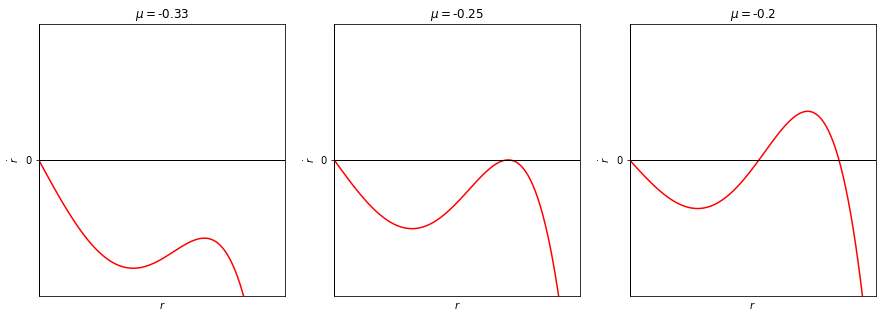

In [22]:
#Define the governing equation of the 1D system
def r_one_dimension(mu, r):
    return mu * r + r**3 - r**5

#Define list of r values for plotting
r_values = np.linspace(0, 1, 100)

#Define three different values of the parameter mu
mu_values = [-1/3, -1/4, -1/5]

fig, ax = plt.subplots(1, 3, figsize=(15, 5))

#Plot three different instances of the system
for n in range(len(mu_values)):
    mu = mu_values[n]
    ax[n].plot(r_values, r_one_dimension(mu, r_values), c = 'r')
    
    ax[n].axhline(y=0, color='k', linewidth=1)
    ax[n].axvline(x=0, color='k', linewidth=1)
    
    #Format figure
    ax[n].set_xlim([0, 1])
    ax[n].set_ylim([-0.1, 0.1])
    
    ax[n].set_title(rf'$\mu =${round(mu, 2)}')
    
    ax[n].set_xticks([])
    ax[n].set_yticks([0])
    
    ax[n].set_xlabel(r'$r$')
    ax[n].set_ylabel(r'$\dot r$')
    
plt.show()

Cf. the Subcritical Hopf Bifrucation example. For $\mu < -\frac{1}{4}$, the system only has an unstable sprial at the origin (left). At the critical value $\mu_c = -\frac{1}{4}$ a *half-stable cycle* emerges (middle, $\dot r < 0$ on both sides). For $-\frac{1}{4} < \mu < 0$, this splits into an unstable and a stable limit cycle (right).

### 2) Infinite-Period Bifurcation (SNIPER)

**Example**: $\dot r = r \left( 1 - r^2 \right)$ and $\dot \theta = \omega - \sin{\theta}$ where we can again treat the second equation as a 1D equation.

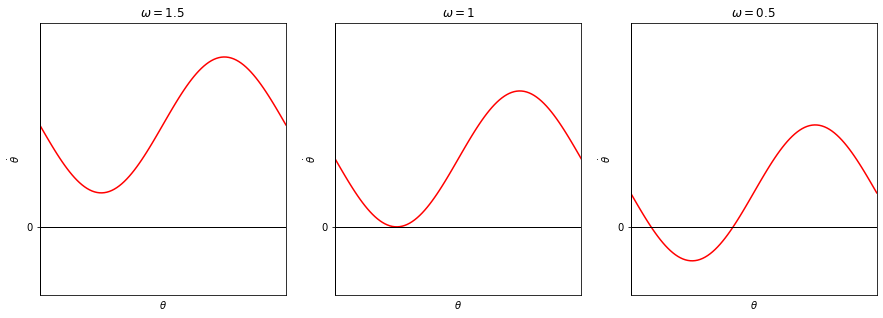

In [34]:
#Define the governing equation of the 1D system
def theta_one_dimension(omega, theta):
    return omega - np.sin(theta)

#Define list of theta values for plotting
theta_values = np.linspace(0, 2*np.pi, 100)

#Define three different values of the parameter omega
omega_values = [1.5, 1, 0.5]

fig, ax = plt.subplots(1, 3, figsize=(15, 5))

#Plot three different instances of the system
for n in range(len(omega_values)):
    omega = omega_values[n]
    ax[n].plot(theta_values, theta_one_dimension(omega, theta_values), c = 'r')
    
    ax[n].axhline(y=0, color='k', linewidth=1)
    ax[n].axvline(x=0, color='k', linewidth=1)
    
    #Format figure
    ax[n].set_xlim([0, 2*np.pi])
    ax[n].set_ylim([-1, 3])
    
    ax[n].set_title(rf'$\omega =${round(omega, 2)}')
    
    ax[n].set_xticks([])
    ax[n].set_yticks([0])
    
    ax[n].set_xlabel(r'$\theta$')
    ax[n].set_ylabel(r'$\dot \theta$')
    
plt.show()

Above, as $\omega$ crosses the critical value $\omega_c = 1$, an unstable and a stable fixed point are born. See p. 265 for the phase portrait.

We then look at the $(t, x)$ plane of the system.

$x = r \cos{\theta}$ and $y = r \sin{\theta}$, so:

$\dot x = \dot r \cos{\theta} - r \dot \theta \sin{\theta} = r \left( 1 - r^2 \right) \cos{\theta} - r \omega \sin{\theta} + r \sin^2{\theta}$

$\dot y = \dot r \sin{\theta} + r \dot \theta \cos{\theta} = r \left( 1 - r^2 \right) \sin{\theta} + r \omega \cos{\theta} - r \sin{\theta} \cos{\theta}$

where $r^2 = x^2 + y^2$ and $\theta = \tan^{-1}{\left( \frac{y}{x} \right)}$.

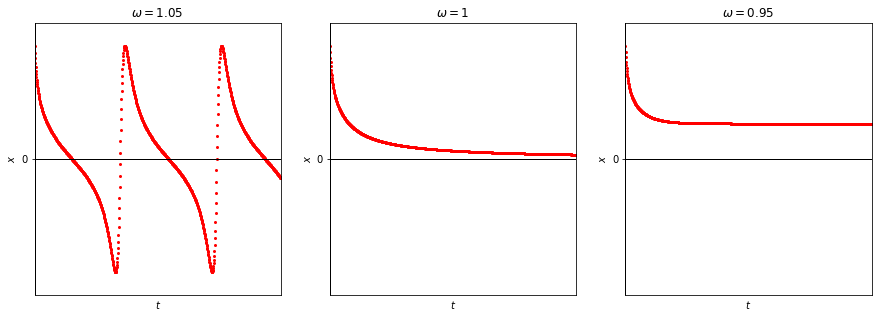

In [56]:
#Define the governing equations in Cartesian coordinates
def infinite_cartesian(v):
    x, y = v[0], v[1]
    
    r = np.sqrt(x**2 + y**2)
    theta = np.arctan2(y, x)
    
    x_deriv = r*(1-r**2)*np.cos(theta) - r*omega*np.sin(theta) + r*np.sin(theta)**2
    y_deriv = r*(1-r**2)*np.sin(theta) + r*omega*np.cos(theta) - r*np.sin(theta)*np.cos(theta)
    
    return np.array([x_deriv, y_deriv])

#Define three different values of the parameter omega
omega_values = [1.05, 1, 0.95]

#Choose fitting time step for graphing
time_step = 0.05

fig, ax = plt.subplots(1, len(omega_values), figsize = (15, 5))

for n in range(len(omega_values)):
    #Declare the value of omega
    omega = omega_values[n]
    
    #Reset initial condition
    v = [1, 1]

    #Plot the (t, x) plane
    for t in np.arange(0, 50, time_step):
        ax[n].plot(t, v[0], 'o', ms = 2, c = 'r')
        
        #Get the next step using 4th-order Runge-Kutta
        v = st.runge_kutta(v, infinite_cartesian, dt = time_step)
    
    #Format figure
    ax[n].set_title(rf'$\omega =${omega}')
    
    ax[n].axhline(y=0, color='k', linewidth=1)
    ax[n].axvline(x=0, color='k', linewidth=1)
    
    ax[n].set_xlim([0, 50])
    ax[n].set_ylim([-1.2, 1.2])
        
    ax[n].set_xticks([])
    ax[n].set_yticks([0])
    
    ax[n].set_xlabel(r'$t$')
    ax[n].set_ylabel(r'$x$')
    
plt.show()

The resemblance to a graph of heart beat (nerve cell firing) is no coincidence!

See p. 267 of Strogatz for the universal *Scaling Laws* of global bifurcations.
> By measuring the scaling near a bifurcation in an experiment, the nature of the bifurcation may be identified.

### Coupled Oscillators and Quasiperiodicity (ch. 8.6, p. 276–281)

**2D Phase Spaces**: Plane, Cylinder, Sphere, Torus (*Sync*, ch. 6).

The torus is the natural phase space of systems of the form:

$\dot \theta_1 = f_1(\theta_1, \theta_2)$

$\dot \theta_2 = f_2(\theta_1, \theta_2)$

An example of one such system is the simple model of *coupled oscillators*:

$\dot \theta_1 = \omega_1 + K_1 \sin{(\theta_2 - \theta_1)}$

$\dot \theta_2 = \omega_2 + K_2 \sin{(\theta_1 - \theta_2)}$

where $\theta_1, \theta_2$ are the phases of the oscillators, $\omega_1, \omega_2 > 0$ are their natural frequencies, and $K_1, K_2$ are coupling constants. This kind of model was used by Strogatz to study human circadian rhythms and sleep-wake cycles (see *Sync* for background).

Drawing toroidal phase portraits is difficult, so an equivalent representation using periodic boundary conditions may be used.

See Strogatz ch. 8.6 for illustrations of the uncoupled and coupled systems.
> In a nutshell, for uncoupled oscillators $\frac{\omega_1}{\omega_2} =$ *rational* results in all the trajecotries being closed orbits, while $\frac{\omega_1}{\omega_2} =$ *irrational* corresponds to *quasiperiodicity* (trajectories never close and are *dense* on the torus).
>> **Note**: In a quasiperiodic system, neighbouring trajectories do not diverge exponentially $\rightarrow$ not chaotic!

**Next Actions**:
- ~Start reading *The Misbehaviour of Markets*~
- ~Write first two sections of the Interim Reflective Report~
- Do exercises 8.1.15 (true believers), ~8.2.3~ (Hopf bifurcation) and 8.4.4 (phase-locked loop)
- Do exercises ~8.6.5~ (Lissajous figures), 8.67 and 8.6.8 (quasiperiodicity)

**Exercise 8.6.5** Plotting Lissajous Figures

Parametric form: $x(t) = \sin{t}$ and $y(t) = \sin{\omega t}$.

In [93]:
#Define the parametric equations
def lissajous(omega, t):
    x = np.sin(t)
    y = np.sin(omega*t)
    
    return x, y

#Define function for plotting the Lissajous figure
def plot_lissajous(omega, time = 100, steps = 1000):
    plt.figure(figsize = (8, 6))

    for t in np.linspace(0, time, steps):
        plt.plot(lissajous(omega, t)[0], lissajous(omega, t)[1], 'o', ms = 2, c = 'b')
    
    plt.axhline(y=0, color='k', linewidth=1)
    plt.axvline(x=0, color='k', linewidth=1)
    
    plt.title(rf'$\omega =${round(omega, 2)}')
    
    plt.show()

**a)** $\omega = 3$

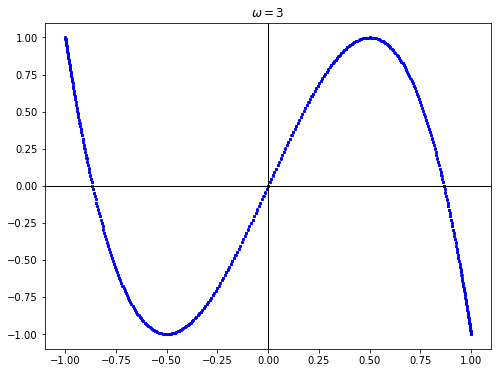

In [94]:
plot_lissajous(3)

**b)** $\omega = \frac{2}{3}$

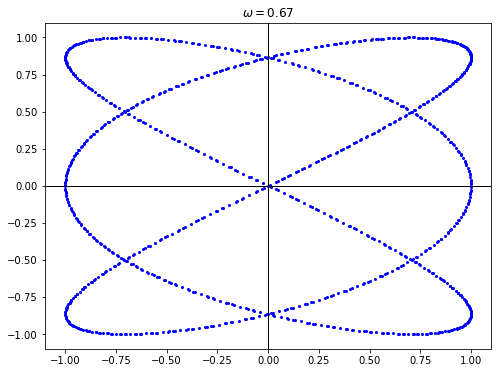

In [95]:
plot_lissajous(2/3)

**c)** $\omega = \frac{5}{3}$

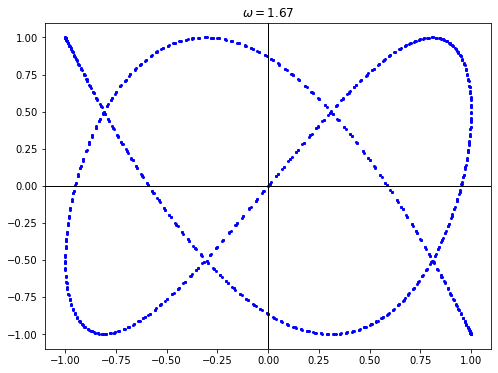

In [96]:
plot_lissajous(5/3)

**d)** $\omega = \sqrt{2}$

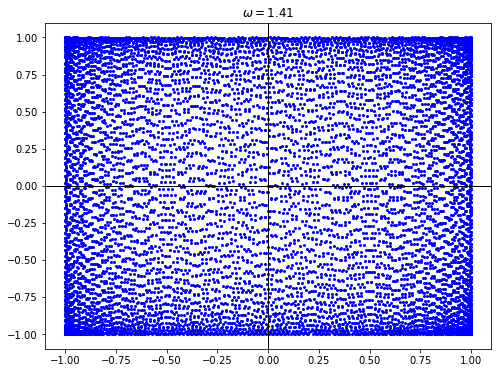

In [101]:
plot_lissajous(np.sqrt(2), 1000, 10000)

**e)** $\omega = \pi$

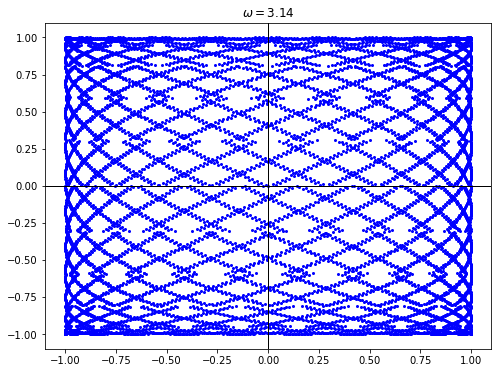

In [102]:
plot_lissajous(np.pi, 1000, 10000)

**f)** $\omega = \frac{1}{2} (1 + \sqrt{5})$

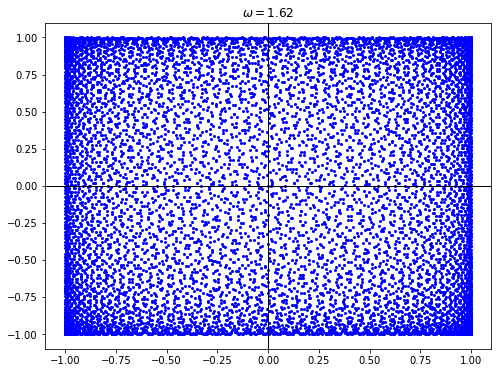

In [104]:
plot_lissajous(1/2*(1+np.sqrt(5)), 1000, 10000)

The difference between rational and irrational values of $\omega$ is evident. These figures should be familiar from the Year 1 Practical Physics component.

## Lecture 15 – Chaotic Waterwheel (ch. 9.1)

**Note**: This is the first lecture of the chaos part of the course.

For background reading, see *Sync* ch. 7 and *Chaos* ch. 1 "The Butterfly Effect".

The derivation of the governing equations, though intuitive, is fairly long and will not be replicated here. Instead, see Strogatz ch. 9.1 and especially p. 311 for an illustration of Willem Malkus's waterwheel setup.
> This system acts as a mechanical analogue of the famous *Lorenz Equations* (p. 309).

### Notation (p. 312–313)

$\omega(t) = $ angular velocity of the wheel

$\theta = $ angle in the lab frame ($\theta = 0 \leftrightarrow$ 12:00)

$Q(\theta) = $ inflow rate of water

$r = $ radius of the wheel

$m(\theta, t) = $mass distribution of water around the rim of the wheel
> The mass between two angles $\theta_1$ and $\theta_2$ is defined as $M(t) = \int_{\theta_1}^{\theta_2} m(\theta, t) d\theta$.

### Conservation of Mass $\rightarrow$ Continuity Equation (p. 313–314)

From the textbook derivation we get the *continuity equation* (PDE):

$\frac{\partial m}{\partial t} = Q - Km - \omega \frac{\partial m}{\partial \theta}$ **(1)**

where $K = $ leakage rate and $\omega \frac{\partial m}{\partial \theta}$ is the transport term.

### Torque Balance (p. 315–316)

As $t \to \infty$, one can show that the moment of inertia of the wheel $I(t) \to $ constant.

**Recall**: $I = Mr^2 + I_{wheel}$ by the *parallel axis theorem* (DVC).
\
\
\
The equation of motion can then be derived from Newton's Second Law $F = ma$:

$I \dot \omega = $ damping torque + gravitational torque.
\
\
\
This yields an *integro-differential equation* for the torque balance:

$I \dot \omega = - \nu \omega + gr \int_0^{2\pi} m(\theta, t) \sin{\theta} d \theta$ **(2)**

where $\nu > 0$ is the rotational damping rate (viscous + inertial damping), $g = g_0 \sin{\alpha}$ is the effective gravitational acceleration ($g_0 \approx 9.81$ ms$^{-1}$), and $\alpha$ is the tilt of the waterwheel w.r.t. the horizontal.

### Amplitude Equations (p. 316–317)

Equations **(1)** and **(2)** describe the behaviour of the waterwheel completely.
> Note: The only nonlinearity in these equations is due to the $\omega \frac{\partial m}{\partial \theta}$ term.

We now derive the amplitude equations of the system using [*Fourier analysis*](https://en.wikipedia.org/wiki/Fourier_analysis) (more on this in Year 3).
\
\
\
Since $m(\theta, t)$ is $2\pi$-periodic in $\theta$, we can write it as a Fourier series:

$m(\theta, t) = \sum_{n = 0}^\infty \left[ a_n (t) \sin{n \theta} + b_n (t) \cos{n \theta} \right]$ **(3)**

where $a_n, b_n$ are the amplitudes of the different *harmonics* or *modes* of the system.
\
\
\
Similarly, the inflow can be expressed as a Fourier series:

$Q(\theta) = \sum_{n = 0}^\infty q_n \cos{n \theta}$ **(4)**

where the $\sin{n \theta}$ terms are left out due to the water being added symmetrically to the system.
\
\
\
The series **(3)** and **(4)** are then substituted into the equation **(1)**:

$\frac{\partial}{\partial t} \sum_{n = 0}^\infty \left[ a_n (t) \sin{n \theta} + b_n (t) \cos{n \theta} \right] = \sum_{n = 0}^\infty q_n \cos{n \theta} - K \sum_{n = 0}^\infty \left[ a_n (t) \sin{n \theta} + b_n (t) \cos{n \theta} \right] - \omega \frac{\partial}{\partial \theta} \sum_{n = 0}^\infty \left[ a_n (t) \sin{n \theta} + b_n (t) \cos{n \theta} \right]$

where, due to linear independence, we can treat the coefficients of the $\cos$ and $\sin$ terms separately.

$\Rightarrow \dot a_n = n \omega b_n - K a_n$ and $\dot b_n = - n \omega a_n - K b_n + q_n$ where $n = 0, 1, ...$.
\
\
\
Similarly, substituting **(3)** and **(4)** into **(2)**:

$I \dot \omega = -\nu \omega + gr \int_0^{2\pi} \left( \sum_{n = 0}^\infty \left[ a_n (t) \sin{n \theta} + b_n (t) \cos{n \theta} \right] \right) \sin{\theta} d\theta = -\nu \omega + gr \int_0^{2\pi} a_1 \sin^2{\theta} d\theta = -\nu \omega + \pi gr a_1$

where only one term in the integral "survives" due to orthogonality of the trigonometric functions.
\
\
\
$\Rightarrow a_1, b_1, \omega$ form a *closed system* that is decoupled from $n \neq 1$, so we can write:

$\dot a_1 = \omega b_1 - K a_1$

$\dot b_1 = - \omega a_1 - K b_1 + q_1$

$\dot \omega = \frac{-\nu \omega + \pi gr a_1}{I}$

which are equivalent to the Lorenz equations (Exercise 9.1.3) and will be analysed in [Lecture 16](https://www.youtube.com/watch?v=U-bWDtbB4qY&list=PLbN57C5Zdl6j_qJA-pARJnKsmROzPnO9V&index=16).

**Exercise 8.2.3** Classifying a Hopf Bifurcation

The system is governed by the equations:

$\dot x = - y + \mu x + xy^2$

$\dot y = x + \mu y - x^2$

and undergoes a Hopf bifurcation at parameter value $\mu = 0$.

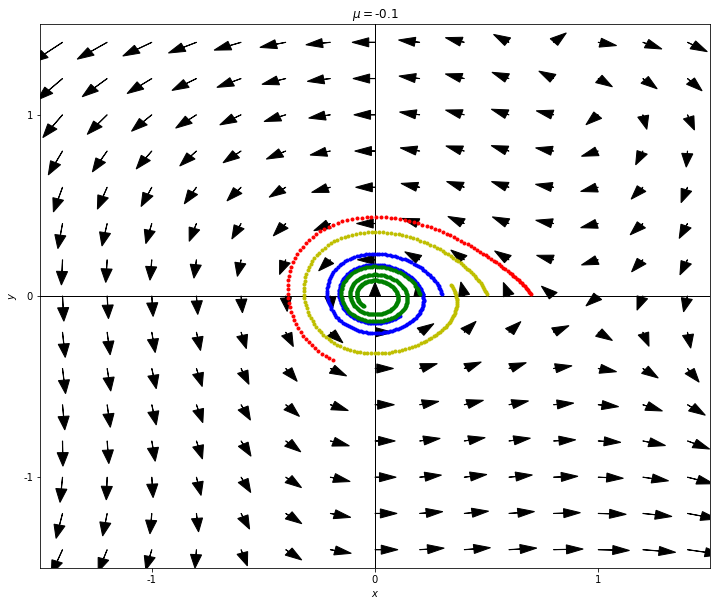

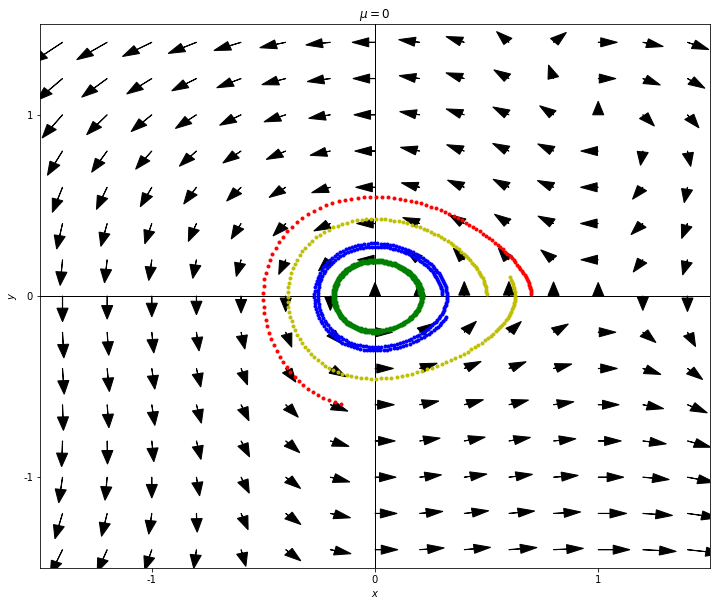

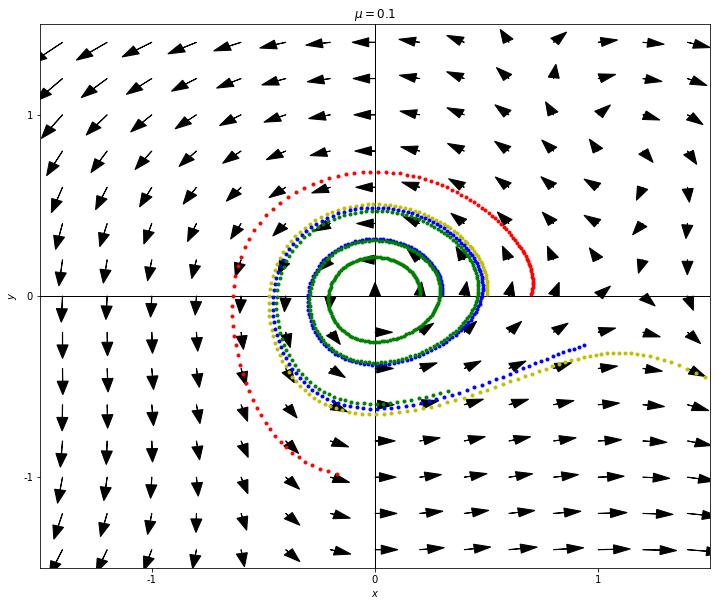

In [67]:
#Define the governing equations
def hopf(v):
    x_deriv = - v[1] + mu * v[0] + v[0] * v[1]**2
    y_deriv = v[0] + mu * v[0] - v[0]**2
    
    return np.array([x_deriv, y_deriv])

#Plot three different instances of the system
for mu in [-0.1, 0, 0.1]:
    #Plot the direction field of the system
    st.plot_direction_field(hopf, -2, 2, 21)
    
    #Plot four trajectories of the system with different initial conditions
    st.plot_trajectory(hopf, [0.7, 0.01], 100, dt = 0.05)
    st.plot_trajectory(hopf, [0.5, 0.01], 150, c = 'y', dt = 0.05)
    st.plot_trajectory(hopf, [0.3, 0.01], 250, c = 'b', dt = 0.05)
    st.plot_trajectory(hopf, [0.2, 0.01], 350, c = 'g', dt = 0.05)
    
    plt.xlim([-1.5, 1.5])
    plt.ylim([-1.5, 1.5])

    plt.title(rf'$\mu =${mu}')
    
plt.show()

The fixed point at the origin turns from a stable into an unstable spiral. This is characteristic of a *degenerate Hopf bifurcation* (p. 256).

## Lecture 16 – Analysis of the Waterwheel and Lorenz Equations

### Fixed Points of the Waterwheel Equations (p. 317–319)

At the end of Lecture 15, we got the equations:

$\dot a_1 = \omega b_1 - K a_1$

$\dot b_1 = - \omega a_1 - K b_1 + q_1$

$\dot \omega = \frac{-\nu \omega + \pi gr a_1}{I}$

The behaviour of the higher modes $n \neq 1$ is explored in Exercise 9.1.2.
\
\
\
We can then find the fixed points of the system:

$\dot a_1 = 0 \Rightarrow a_1 = \frac{\omega b_1}{K}$ **(1)**

$\dot b_1 = 0 \Rightarrow \omega a_1 = q_1 - K b_1$ **(2)**

$\dot \omega = 0 \Rightarrow a_1 = \frac{\nu \omega}{\pi gr}$ **(3)**

Through eliminating $a_1$ from **(1)** and **(2)**, we get $b_1 = \frac{K q_1}{\omega^2 + K^2}$.

Equating **(1)** and **(3)** yields $\frac{\omega b_1}{K} = \frac{\nu \omega}{\pi gr}$, so $\omega = 0$ or $b_1 = \frac{K \nu}{\pi gr}$.
\
\
\
There are thus two kinds of fixed points:

1) $\omega = 0 \Rightarrow a_1 = 0$ and $b_1 = \frac{q_1}{K}$ where leakage perfectly balances the inflow, so there is no rotation.

2) $\omega \neq 0$, so $b_1 = \frac{K \nu}{\pi gr} = \frac{K q_1}{\omega^2 + K^2} \Rightarrow \omega^2 = \frac{\pi gr q_1}{\nu} - K^2$, so there are two solutions $\pm \omega^*$ iff the RHS is positive.
> These correspond to steady rotation in either direction.

$\Rightarrow$ The condition for two solutions can be expressed as $\frac{\pi gr q_1}{K^2 \nu} > 1$ where the dimensionless group on the LHS is the *Rayleigh number* (p. 318).
> This is where the analogy to convection comes in.

### Lorenz Equations (p. 319–325)

See: *J. Atmos. Sci.* **20** (1963) pp. 130–141.

Derived from a simplified model of convection. First example of a system with a *chaotic attractor*.
\
\
\
The famous equations:

$\dot x = \sigma (y - x)$

$\dot y = rx - y - xz$

$\dot z = xy - bz$

where $\sigma, r, b > 0$ are parameters. Here $\sigma$ is the *Prandtl number*, $r$ is the Rayleigh number, and $b$ is a nameless parameter related to the aspect ratio of the convection rolls.
> Note: The equations have two nonlinear terms $xy$ and $xz$.

These equations also arise in other fields, such as laser dynamics and geomagnetic dynamos.

### Simple Properties of the Lorenz System

1) The equations are symmetric under the transformation $(x, y) \to (-x, -y)$.
> Hence, if $\left( x(t), y(t), z(t) \right)$ is a solution, so is $\left( -x(t), -y(t), z(t) \right)$.

2) The system is dissipative, i.e. volumes in phase space contract under the flow (p. 320–322).
> Recall: Divergence theorem from DVC.

Pick a volume $V(t)$. Points on its surface flow according to the vector field.

Let $\underline{x} = (x, y, x)$ and $\underline{u} = \underline{\dot x}$ which is the velocity in phase space.

The normal outward velocity at the boundary $\partial V = S$ is then $\underline{u} \cdot \underline{n} = \underline{\dot x} \cdot \underline{n}$.

Then $V(t + \Delta t) = V(t) + \Delta t \int_S \left( \underline{u} \cdot \underline{n} \right) dA$ which can be expressed as $\frac{V(t + \Delta t) - V(t)}{\Delta t} = \int_S \left( \underline{u} \cdot \underline{n} \right) dA$.

Then taking the limit $\Delta t \to 0$, we get $\dot V = \int_S \left( \underline{u} \cdot \underline{n} \right) dA$ which we can apply the divergence theorem to $\Rightarrow \dot V = \int_V \left( \nabla \cdot \underline{u} \right) dV$.
> For the Lorenz system $\nabla \cdot \underline{u} = - \sigma - 1 - b = - ( \sigma + b + 1) < 0$ (constant), so $\dot V = - ( \sigma + b + 1) V$.

$\Rightarrow V(t) = V(0) e^{-(\sigma + b + 1)t}$, so the volumes in phase space shrink exponentially fast.

This means all the trajectories tend to a limiting set of *zero volume* $\rightarrow$ *strange attractor*.

3) The system has the fixed point $(x, y, z) = (0, 0, 0)$ for all $r$ as well as the symmetric fixed points $x = y = \pm \sqrt{b(r - 1)}, z = r - 1$ for $r > 1$.
> The latter are often referred to as $C^+$ and $C^-$ $\rightarrow$ these undergo a pitchfork bifurcation at $r = 1$.

4) Linear stability analysis of the origin (p. 322): $r > 1 \rightarrow$ saddle point, $r < 1 \rightarrow$ stable node.

**Exercise 8.1.15** The Power of True Believers

Based on the work of Marvel et al. (2012) and Xie et al. (2011).

The opinion dynamics in a population are governed by the equations:

$\dot n_A = \left( p + n_A \right) n_{AB} - n_A n_B$

$\dot n_B = n_B n_{AB} - \left( p + n_A \right) n_{B}$

where $n_{AB} = 1 - \left( p + n_A \right) - n_B$, $p$ is the unchanging fraction of committed, true believers in A, and $n_A, n_B$ and $n_{AB}$ are the current fractions of the A-believers, B-believers and the fence-sitters in the population, respectively.

**a)** Interpreting the terms:

In the $\dot n_A$ equation, someone in the AB camp coming into contact with either a true believer or an A-believer is drawn to the A camp, contributing a positive change to $n_A$. On the other hand, an A-believer encountering a B-believer immeidately joins the undecided AB camp.

In the $\dot n_B$ equation, a fence-sitter encountering a B-believer becomes one themselves, increasing the fraction $n_B$. Simultaneously, some of the B-believers are drawn to the AB camp by the true believers and the A-believers, so the fraction $n_B$ decreases.

Note: In the textbook the second term of the second equation is given as $- \left( p + n_A \right) n_{AB}$ but this is clearly wrong since B-believers would never be converted to AB.

**b)** Initial conditions: $n_B (0) = 1 - p$ and $n_A (0) = n_{AB} (0) = 0$.

Clearly, somewhere in the interval $p \in \left]0.13, 0.2\right[$ the behaviour of the system changes at a critical value $p_c$. For $p < p_c$, the majority still holds the opinion B at the end, whereas for $p > p_c$, the opinion A emerges victorious.

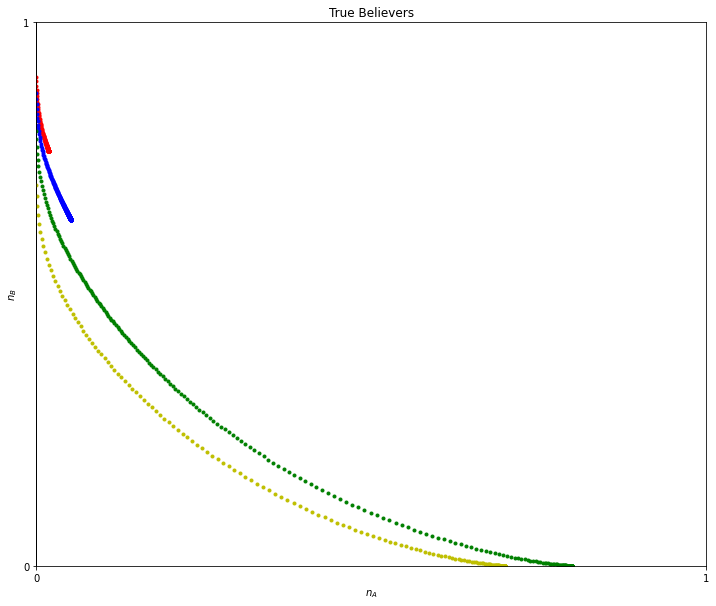

In [43]:
#Define the governing equations
def true_believers(v):
    n_A, n_B = v[0], v[1]
    
    n_AB = 1 - (p + n_A) - n_B
    
    n_A_deriv = (p + n_A)*n_AB - n_A*n_B
    n_B_deriv = n_B*n_AB - (p + n_A)*n_B
    
    return np.array([n_A_deriv, n_B_deriv])

p = 0

#Use the direction field as a template for trajectory plotting
st.plot_direction_field(true_believers, 0, 1, 0)

#Plot multiple trajectories with different values of p
p = 0.1
st.plot_trajectory(true_believers, [0, 1-p], 500)

p = 0.13
st.plot_trajectory(true_believers, [0, 1-p], 500, c = 'b')

p = 0.2
st.plot_trajectory(true_believers, [0, 1-p], 500, c = 'g')

p = 0.3
st.plot_trajectory(true_believers, [0, 1-p], 500, c = 'y')

#Format figure
plt.title('True Believers')

plt.xlabel(r'$n_A$')
plt.ylabel(r'$n_B$')

plt.xlim(0, 1)
plt.ylim(0, 1)

plt.show()

**c)** Note: This exercise is unfinished and the notebook will be amended with the solution later.

**Next Actions**:
- [Lecture 17 – Chaos in the Lorenz Equations](https://www.youtube.com/watch?v=gscKcPAm-H0&list=PLbN57C5Zdl6j_qJA-pARJnKsmROzPnO9V&index=17) (Read corresponding chapter beforehand!)
- ~Write sections 3 and 4 of the Interim Reflective Report~